In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df =pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Analyzing Best-Seller Trends Across Product Categories

In [3]:
crosstab_result = pd.crosstab(df['category'],df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
#Are there categories where being a best-seller is more prevalent?
proportion_table= df['category'].value_counts().sort_values(ascending=False)
proportion_table

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Plugs                                        107
Motorbike Chassis                            107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: category, Length: 296, dtype: int64

In [5]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [6]:
from scipy.stats.contingency import association
import scipy.stats as stats 

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

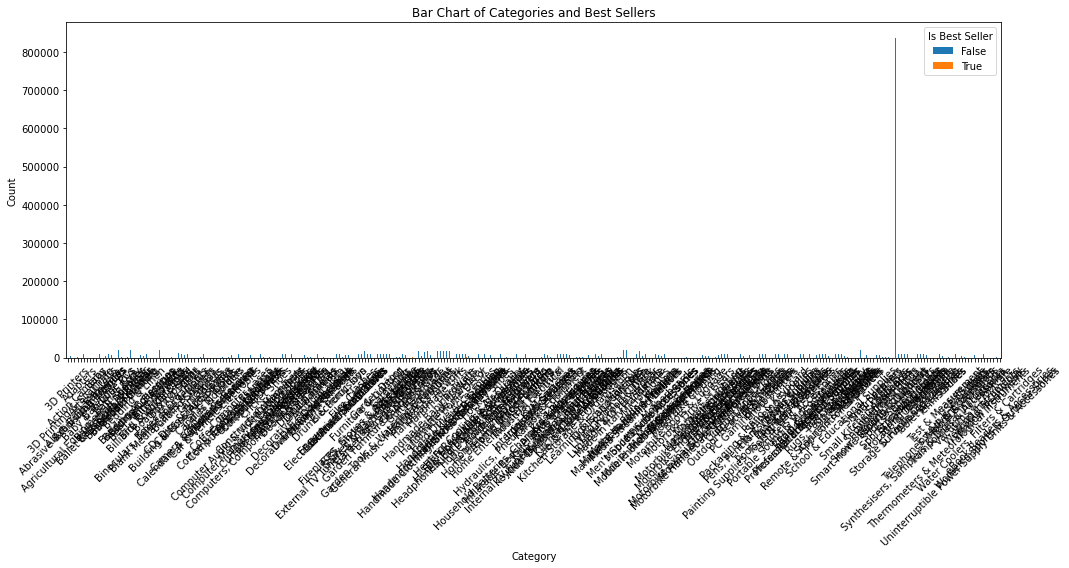

In [7]:
# Plot with a larger figure size
crosstab_result.plot(kind="bar", stacked=False, figsize=(15, 8))

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Bar Chart of Categories and Best Sellers")
plt.legend(title="Is Best Seller")
plt.tight_layout()
plt.show()


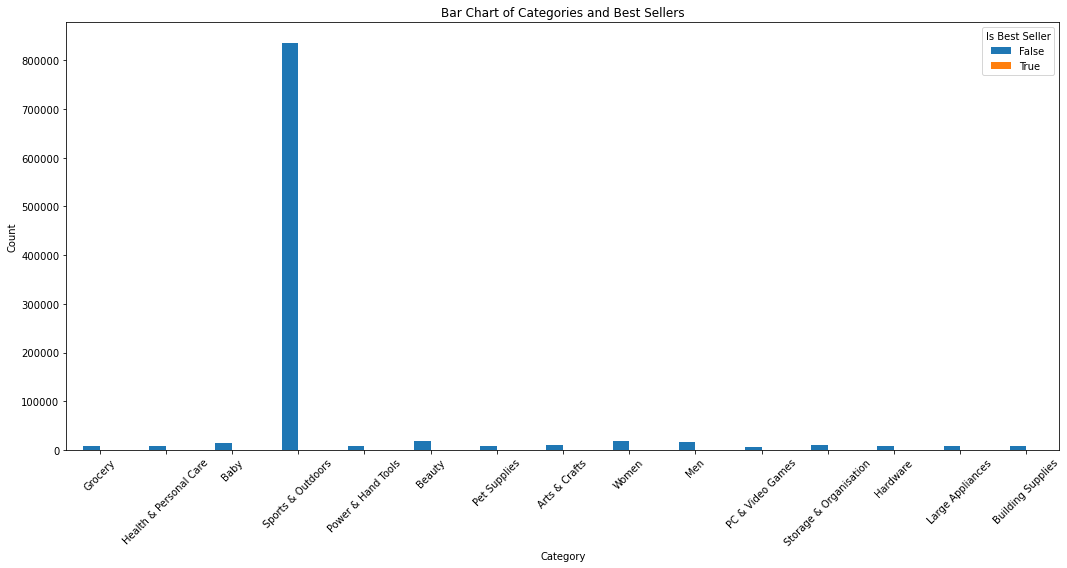

In [8]:
top_30_crosstab = crosstab_result.sort_values(by=1, ascending=False).head(15)

# Plot with a larger figure size
top_30_crosstab.plot(kind="bar", stacked=False, figsize=(15, 8))

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Bar Chart of Categories and Best Sellers")
plt.legend(title="Is Best Seller")
plt.tight_layout()
plt.show()


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [9]:
# Interquartile Range
q1 = df['price'].quantile(0.25)  # First quartile (25th percentile)
q3 = df['price'].quantile(0.75)
iqr=q3- q1

# Step 2: Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Step 3: Filter the dataset to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Step 4: Proceed with the cleaned dataset
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_no_outliers)}")

Original dataset size: 2443651
Cleaned dataset size: 2115963


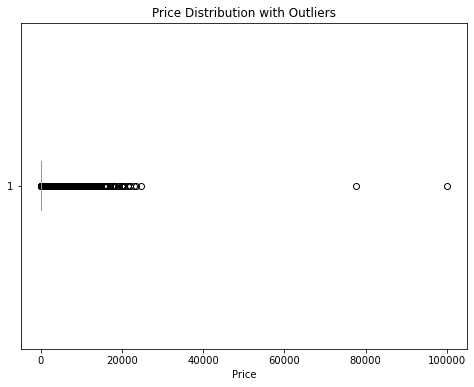

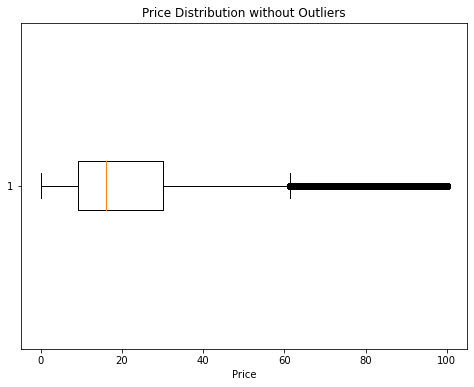

In [10]:
# Boxplot before removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)
plt.title("Price Distribution with Outliers")
plt.xlabel("Price")
plt.show()

# Boxplot after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_outliers['price'], vert=False)
plt.title("Price Distribution without Outliers")
plt.xlabel("Price")
plt.show()

### 1.violin plots

In [11]:
top_20_category=df['category'].value_counts().sort_values(ascending=False).head(20).index
# Step 3: Filter the DataFrame to include only rows from these categories
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_category)]
top_20_category

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances', 'Handmade Gifts',
       'Handmade Home Décor', 'Luggage and travel gear', 'Handmade Jewellery',
       'Handmade Artwork', 'Women', 'Handmade Home & Kitchen Products',
       'Handmade Kitchen & Dining', 'Men', 'Baby'],
      dtype='object')

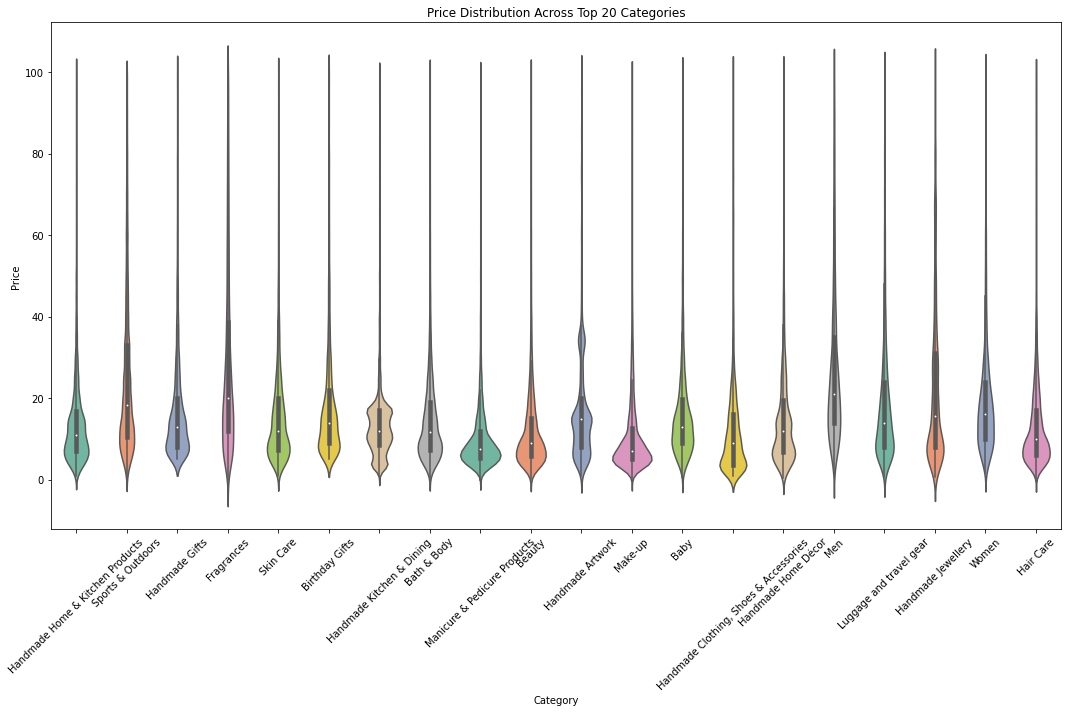

In [12]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=df_top_20, x='category', y='price', palette='Set2')

# Step 4: Customize the plot
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Price")
plt.title("Price Distribution Across Top 20 Categories")
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
median_price=df.groupby('category')['price'].median()
# Step 2: Identify the category with the highest median price
highest_median_category = median_price.idxmax()
highest_median_price = median_price.max()

# Step 3: Display the result
print(f"The product category with the highest median price is '{highest_median_category}' with a median price of {highest_median_price:.2f}.")

The product category with the highest median price is 'Laptops' with a median price of 1042.72.


### 2.bar charts

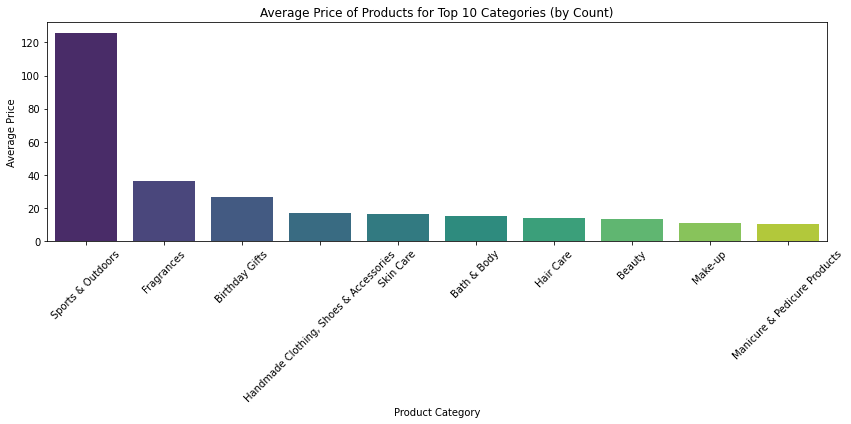

In [14]:
top_10_categories = df['category'].value_counts().head(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]

# Step 3: Calculate the average price for each of these categories
avg_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis")
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.title("Average Price of Products for Top 10 Categories (by Count)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
mean_price=df.groupby('category')['price'].mean()
highest_avrg_category = mean_price.idxmax()
highest_avrg_price = mean_price.max()

# Step 3: Display the result
print(f"The product category with the highest median price is '{highest_avrg_category}' with a median price of {highest_avrg_price:.2f}.")

The product category with the highest median price is 'Laptops' with a median price of 1087.99.


### 3 .box plot

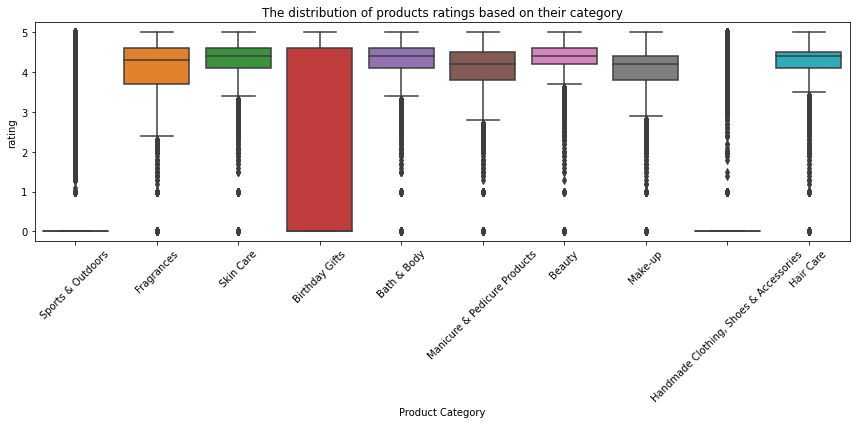

In [16]:
top_10_categories = df['category'].value_counts().head(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]

plt.figure(figsize= (12,6))
sns.boxplot(data=df_top_10, x='category', y='stars')
plt.xlabel("Product Category")
plt.ylabel("rating")
plt.title("The distribution of products ratings based on their category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
median_rating=df.groupby('category')['stars'].median().sort_values(ascending=False)

highest_median_category= median_rating.idxmax()
highest_median_rating= median_rating.max()

print(f"La catégorie avec la médiane la plus élevée est '{highest_median_category}' avec une note médiane de {highest_median_rating:.2f}.")

La catégorie avec la médiane la plus élevée est 'Computer Memory' avec une note médiane de 4.70.


### Part 3: Investigating the Interplay Between Product Prices and Ratings

In [18]:
correlation_df=df['price'].corr(df['stars'])
correlation_df

-0.1249067326214861

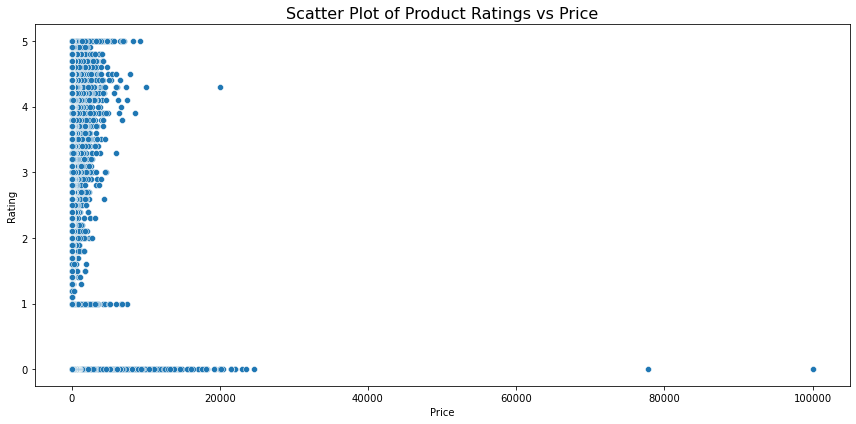

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='price', y='stars')
plt.title("Scatter Plot of Product Ratings vs Price", fontsize=16)
plt.xlabel("Price")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

In [20]:
#Use a correlation heatmap to visualize correlations between all numerical variables.
num_var =df.select_dtypes("number").nunique().sort_values(ascending=False)
num_var

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

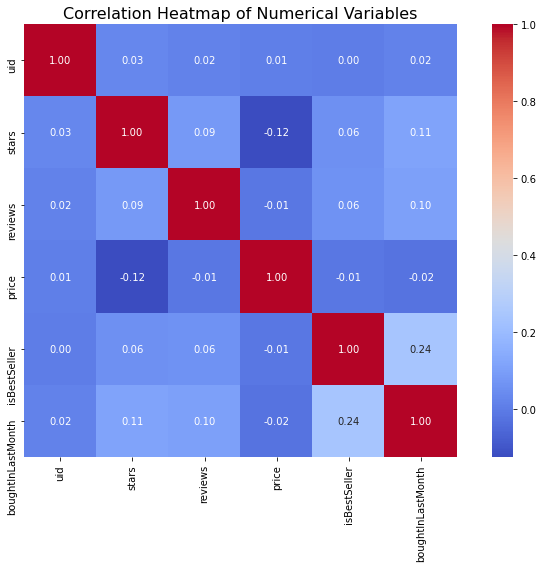

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()  # Compute correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()


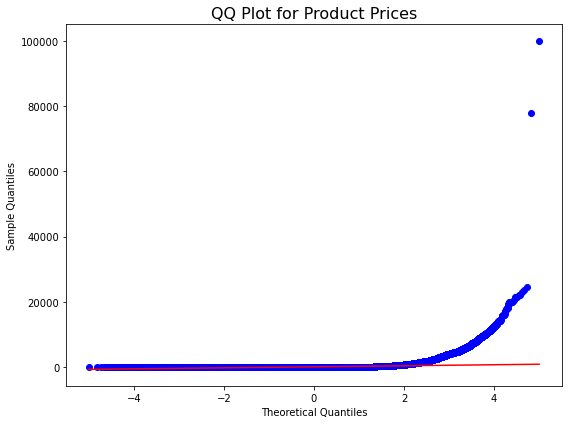

In [22]:

df_filtered = df[df['price'] > 0]

plt.figure(figsize=(8, 6))
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.title("QQ Plot for Product Prices", fontsize=16)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.tight_layout()
plt.show()
